In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
recent_grads=pd.read_csv("recent-grads.csv")

In [5]:
print(recent_grads.shape)
recent_grads.describe()

(173, 21)


,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
recent_grads=recent_grads.dropna()

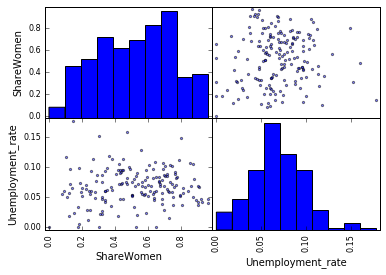

In [40]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(recent_grads[["ShareWomen","Unemployment_rate"]])
plt.show()

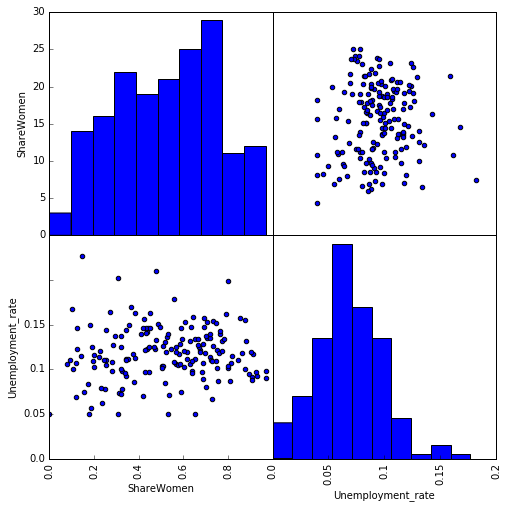

In [26]:
fig = plt.figure(figsize=(8,8))
ax11=fig.add_subplot(2,2,1)
ax12=fig.add_subplot(2,2,2)
ax21=fig.add_subplot(2,2,3)
ax22=fig.add_subplot(2,2,4)

ax11.get_xaxis().set_visible(False)
ax11.get_yaxis().tick_left()
#ax11.set_ylim(0,30)
ax11.set_yticklabels([0, 5, 10, 15, 20, 25, 30])
ax11.set_ylabel("ShareWomen")
ax11.hist(recent_grads['ShareWomen'])

ax12.get_xaxis().set_visible(False)
ax12.get_yaxis().set_visible(False)
#ax12.set_xlim(0,1)
ax12.scatter(recent_grads['Unemployment_rate'],recent_grads['ShareWomen'])

ax21.get_xaxis().tick_bottom()
ax21.get_yaxis().tick_left()
ax21.set_yticklabels([0.00, 0.05, 0.10, 0.15])
ax21.set_xlim(0,1)
ax21.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8], rotation=90)
ax21.set_xlabel("ShareWomen")
ax21.set_ylabel("Unemployment_rate")
ax21.scatter(recent_grads['ShareWomen'],recent_grads['Unemployment_rate'])

ax22.get_xaxis().tick_bottom()
ax22.get_yaxis().set_visible(False)
ax22.set_xlim(0,0.2)
ax22.set_xticklabels([0.00, 0.05, 0.10, 0.15, 0.20], rotation=90)
ax22.set_xlabel("Unemployment_rate")
ax22.hist(recent_grads['Unemployment_rate'])

fig.subplots_adjust(wspace=0,hspace=0)
plt.show()

In [27]:
recent_grads['ShareMen']=recent_grads['Men']/recent_grads['Total']
arts = recent_grads[recent_grads["Major_category"] == "Arts"]

In [35]:
import numpy as np
locs=np.arange(0,len(arts))
offset_locs=locs+0.35

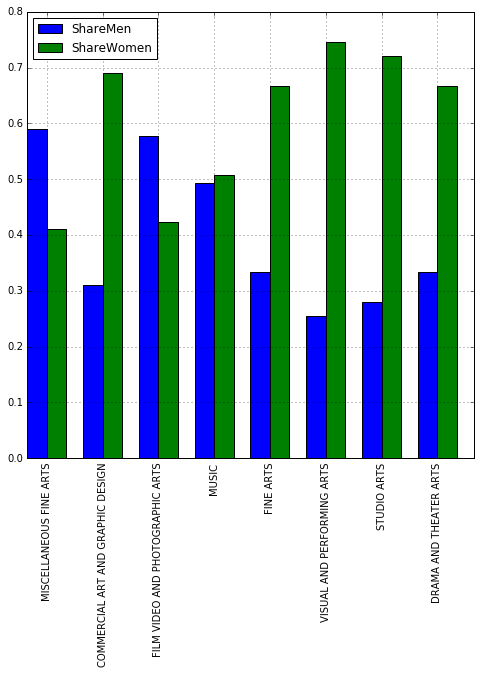

In [38]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
bar_1=ax.bar(left=locs,height=arts['ShareMen'].tolist(),width=0.35)
bar_2=ax.bar(left=offset_locs,height=arts['ShareWomen'].tolist(),width=0.35,color='green')
ax.set_xticklabels(arts["Major"].tolist(),rotation=90)
ax.set_xticks(offset_locs)
plt.legend((bar_1, bar_2), ("ShareMen", "ShareWomen"), loc="upper left")
plt.grid()
plt.show()

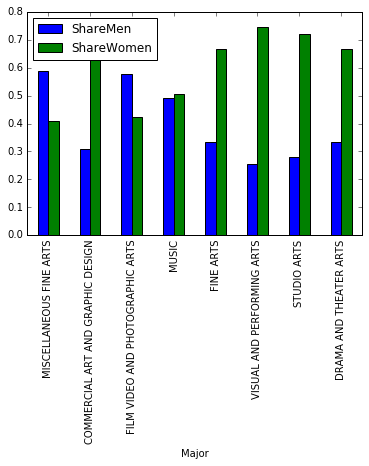

In [43]:
arts.set_index("Major", inplace=True)
arts[["ShareMen", "ShareWomen"]].plot(kind="bar")
plt.show()